In [2]:
import requests
import pickle
import pprint
import json
import pandas as pd 
import time
from tqdm import tqdm
import datetime

In [3]:
url = 'http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol=sz000001&scale=5&ma=5&datalen=1023'
response = requests.get(url).text
df = pd.DataFrame(json.loads(response))
df

,day,open,high,low,close,volume,ma_price5,ma_volume5
0,2020-11-04 11:25:00,18.270,18.340,18.250,18.290,2264200,18.248,3074954
1,2020-11-04 11:30:00,18.280,18.320,18.210,18.260,1583560,18.268,3090940
2,2020-11-04 13:05:00,18.260,18.300,18.130,18.200,1420740,18.250,2361558
3,2020-11-04 13:10:00,18.200,18.210,18.140,18.160,874220,18.236,1669076
4,2020-11-04 13:15:00,18.160,18.180,18.110,18.160,825800,18.214,1393704
...,...,...,...,...,...,...,...,...
1018,2020-12-03 13:45:00,19.580,19.760,19.550,19.730,3557369,19.568,1247434
1019,2020-12-03 13:50:00,19.730,19.750,19.560,19.590,725100,19.586,1244189
1020,2020-12-03 13:55:00,19.580,19.590,19.470,19.520,1109400,19.588,1297165
1021,2020-12-03 14:00:00,19.520,19.530,19.480,19.480,686900,19.582,1344750


In [2]:
with open('data/symbol_ind.pkl', 'rb') as f:
    symbol = pickle.load(f)

In [4]:
with pd.HDFStore('data/rawdata.h5', 'a', complevel=4,complib='blosc') as rawdata:
    for ind, ls in tqdm(symbol.items()):
        for s in ls:
            print(ind, s)
            url = 'http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol='+s+'&scale=5&ma=5&datalen=1023'
            response = requests.get(url).text
            data = json.loads(response)
            df = pd.DataFrame(data)
            df['datetime'] = pd.to_datetime(df.day)
            df = df.set_index(['datetime'])
            df['day'] = df.index.date
            df['ukey'] = s
            df['industry'] = ind
            time.sleep(1)
            rawdata[s] = df

  0%|          | 0/110 [00:00<?, ?it/s]

IT设备 sz000021
IT设备 sz000066
IT设备 sz000977
IT设备 sz002152
IT设备 sz002177
IT设备 sz002180
IT设备 sz002308
IT设备 sz002351
IT设备 sz002376
IT设备 sz002528
IT设备 sz002577
IT设备 sz002635
IT设备 sz002866
IT设备 sz002955
IT设备 sz300042
IT设备 sz300045
IT设备 sz300076
IT设备 sz300130
IT设备 sz300202
IT设备 sz300367
IT设备 sz300368
IT设备 sz300449
IT设备 sz300551
IT设备 sz300656
IT设备 sz300743
IT设备 sz300771
IT设备 sz300793
IT设备 sz300802
IT设备 sz300857
IT设备 sh600100
IT设备 sh600271
IT设备 sh600601
IT设备 sh600734
IT设备 sh603019
IT设备 sh603025
IT设备 sh603106
IT设备 sh603496
IT设备 sh688086


  1%|          | 1/110 [00:45<1:22:47, 45.57s/it]

专用机械 sz000404
专用机械 sz000551
专用机械 sz000584
专用机械 sz000925
专用机械 sz002006
专用机械 sz002192
专用机械 sz002204
专用机械 sz002255
专用机械 sz002366
专用机械 sz002529
专用机械 sz002534
专用机械 sz002595
专用机械 sz002613
专用机械 sz002630
专用机械 sz002639
专用机械 sz002645
专用机械 sz002651
专用机械 sz002686
专用机械 sz002690
专用机械 sz002691
专用机械 sz002757
专用机械 sz002786
专用机械 sz002816
专用机械 sz002833
专用机械 sz002837
专用机械 sz002884
专用机械 sz002957
专用机械 sz002960
专用机械 sz002975
专用机械 sz002979
专用机械 sz300023
专用机械 sz300024
专用机械 sz300029
专用机械 sz300092
专用机械 sz300145
专用机械 sz300193
专用机械 sz300201
专用机械 sz300210
专用机械 sz300263
专用机械 sz300276
专用机械 sz300278
专用机械 sz300281
专用机械 sz300293
专用机械 sz300316
专用机械 sz300334
专用机械 sz300382
专用机械 sz300400
专用机械 sz300402
专用机械 sz300411
专用机械 sz300415
专用机械 sz300443
专用机械 sz300450
专用机械 sz300457
专用机械 sz300461
专用机械 sz300462
专用机械 sz300471
专用机械 sz300472
专用机械 sz300475
专用机械 sz300480
专用机械 sz300486
专用机械 sz300499
专用机械 sz300509
专用机械 sz300512
专用机械 sz300521
专用机械 sz300526
专用机械 sz300527
专用机械 sz300540
专用机械 sz300545
专用机械 sz300549
专用机械 sz300569
专用机械 sz300604
专用机械 s

  2%|▏         | 2/110 [03:54<2:39:34, 88.66s/it]

中成药 sz000423
中成药 sz000538
中成药 sz000590
中成药 sz000650
中成药 sz000790
中成药 sz000989
中成药 sz000999
中成药 sz002107
中成药 sz002118
中成药 sz002166
中成药 sz002198
中成药 sz002219
中成药 sz002275
中成药 sz002287
中成药 sz002317
中成药 sz002349
中成药 sz002390
中成药 sz002412
中成药 sz002424
中成药 sz002433
中成药 sz002566
中成药 sz002603
中成药 sz002644
中成药 sz002728
中成药 sz002737
中成药 sz002750
中成药 sz002826
中成药 sz002864
中成药 sz002873
中成药 sz300016
中成药 sz300026
中成药 sz300039
中成药 sz300108
中成药 sz300147
中成药 sz300181
中成药 sz300519
中成药 sz300534
中成药 sz300878
中成药 sh600080
中成药 sh600085
中成药 sh600129
中成药 sh600211
中成药 sh600222
中成药 sh600252
中成药 sh600285
中成药 sh600329
中成药 sh600332
中成药 sh600351
中成药 sh600422
中成药 sh600436
中成药 sh600479
中成药 sh600518
中成药 sh600535
中成药 sh600557
中成药 sh600566
中成药 sh600572
中成药 sh600594
中成药 sh600613
中成药 sh600671
中成药 sh600750
中成药 sh600771
中成药 sh600781
中成药 sh600976
中成药 sh600993
中成药 sh603139
中成药 sh603439
中成药 sh603567
中成药 sh603858
中成药 sh603896
中成药 sh603998
中成药 sh605199


  3%|▎         | 3/110 [05:19<2:36:15, 87.62s/it]

乳制品 sz002329
乳制品 sz002570
乳制品 sz002719
乳制品 sz002732
乳制品 sz002770
乳制品 sz002910
乳制品 sz002946
乳制品 sz300892
乳制品 sz300898
乳制品 sh600419
乳制品 sh600429
乳制品 sh600597
乳制品 sh600882
乳制品 sh600887


  4%|▎         | 4/110 [05:36<1:57:14, 66.36s/it]

互联网 sz000004
互联网 sz000606
互联网 sz000676
互联网 sz000681
互联网 sz000971
互联网 sz002072
互联网 sz002095
互联网 sz002103
互联网 sz002113
互联网 sz002115
互联网 sz002123
互联网 sz002127
互联网 sz002131
互联网 sz002148
互联网 sz002168
互联网 sz002174
互联网 sz002235
互联网 sz002247
互联网 sz002261
互联网 sz002315
互联网 sz002354
互联网 sz002425
互联网 sz002447
互联网 sz002464
互联网 sz002517
互联网 sz002555
互联网 sz002558
互联网 sz002602
互联网 sz002605
互联网 sz002619
互联网 sz002640
互联网 sz002654
互联网 sz002803
互联网 sz002995
互联网 sz003010
互联网 sz300031
互联网 sz300038
互联网 sz300051
互联网 sz300052
互联网 sz300061
互联网 sz300063
互联网 sz300113
互联网 sz300148
互联网 sz300226
互联网 sz300242
互联网 sz300295
互联网 sz300299
互联网 sz300315
互联网 sz300343
互联网 sz300392
互联网 sz300399
互联网 sz300418
互联网 sz300459
互联网 sz300467
互联网 sz300494
互联网 sz300571
互联网 sz300609
互联网 sz300766
互联网 sz300785
互联网 sz300792
互联网 sh600070
互联网 sh600226
互联网 sh600293
互联网 sh600462
互联网 sh600556
互联网 sh600633
互联网 sh600634
互联网 sh600652
互联网 sh600986
互联网 sh601360
互联网 sh603000
互联网 sh603258
互联网 sh603444
互联网 sh603533
互联网 sh603613
互联网 sh603825
互联网 sh603888

  5%|▍         | 5/110 [07:13<2:12:01, 75.44s/it]

仓储物流 sz002010
仓储物流 sz002120
仓储物流 sz002183
仓储物流 sz002210
仓储物流 sz002245
仓储物流 sz002352
仓储物流 sz002468
仓储物流 sz002492
仓储物流 sz002769
仓储物流 sz002800
仓储物流 sz002889
仓储物流 sz002930
仓储物流 sz300013
仓储物流 sz300240
仓储物流 sz300350
仓储物流 sz300873
仓储物流 sh600057
仓储物流 sh600093
仓储物流 sh600119
仓储物流 sh600179
仓储物流 sh600180
仓储物流 sh600233
仓储物流 sh600603
仓储物流 sh600787
仓储物流 sh600794
仓储物流 sh601598
仓储物流 sh603056
仓储物流 sh603066
仓储物流 sh603117
仓储物流 sh603128
仓储物流 sh603329
仓储物流 sh603535
仓储物流 sh603565
仓储物流 sh603569
仓储物流 sh603648
仓储物流 sh603713
仓储物流 sh603813
仓储物流 sh603871
仓储物流 sh603967
仓储物流 sh605050


  5%|▌         | 6/110 [08:01<1:56:19, 67.11s/it]

供气供热 sz000407
供气供热 sz000421
供气供热 sz000593
供气供热 sz000669
供气供热 sz000692
供气供热 sz002259
供气供热 sz002267
供气供热 sz002700
供气供热 sz002893
供气供热 sz002911
供气供热 sz300335
供气供热 sh600167
供气供热 sh600207
供气供热 sh600333
供气供热 sh600617
供气供热 sh600635
供气供热 sh600681
供气供热 sh600719
供气供热 sh600856
供气供热 sh600903
供气供热 sh600917
供气供热 sh600982
供气供热 sh601139
供气供热 sh603053
供气供热 sh603080
供气供热 sh603223
供气供热 sh603393
供气供热 sh603689
供气供热 sh603706
供气供热 sh605169


  6%|▋         | 7/110 [08:36<1:39:01, 57.69s/it]

保险 sz000627
保险 sh600291
保险 sh601318
保险 sh601319
保险 sh601336
保险 sh601601
保险 sh601628


  7%|▋         | 8/110 [08:45<1:12:54, 42.89s/it]

元器件 sz000020
元器件 sz000032
元器件 sz000045
元器件 sz000050
元器件 sz000058
元器件 sz000100
元器件 sz000413
元器件 sz000536
元器件 sz000636
元器件 sz000725
元器件 sz000727
元器件 sz000733
元器件 sz000823
元器件 sz000970
元器件 sz002025
元器件 sz002036
元器件 sz002045
元器件 sz002049
元器件 sz002055
元器件 sz002056
元器件 sz002057
元器件 sz002104
元器件 sz002106
元器件 sz002134
元器件 sz002138
元器件 sz002139
元器件 sz002141
元器件 sz002179
元器件 sz002189
元器件 sz002199
元器件 sz002217
元器件 sz002222
元器件 sz002241
元器件 sz002273
元器件 sz002288
元器件 sz002289
元器件 sz002384
元器件 sz002387
元器件 sz002388
元器件 sz002389
元器件 sz002402
元器件 sz002426
元器件 sz002436
元器件 sz002456
元器件 sz002463
元器件 sz002475
元器件 sz002484
元器件 sz002512
元器件 sz002579
元器件 sz002587
元器件 sz002600
元器件 sz002618
元器件 sz002636
元器件 sz002655
元器件 sz002729
元器件 sz002806
元器件 sz002808
元器件 sz002815
元器件 sz002835
元器件 sz002841
元器件 sz002845
元器件 sz002859
元器件 sz002876
元器件 sz002885
元器件 sz002888
元器件 sz002897
元器件 sz002902
元器件 sz002908
元器件 sz002913
元器件 sz002916
元器件 sz002925
元器件 sz002935
元器件 sz002937
元器件 sz002938
元器件 sz002947
元器件 sz002952
元器件 sz002962

  8%|▊         | 9/110 [12:49<2:53:53, 103.30s/it]

全国地产 sz000002
全国地产 sz000014
全国地产 sz000031
全国地产 sz000036
全国地产 sz000042
全国地产 sz000402
全国地产 sz000616
全国地产 sz000620
全国地产 sz000667
全国地产 sz000736
全国地产 sz000797
全国地产 sz000918
全国地产 sz001979
全国地产 sz002133
全国地产 sz002146
全国地产 sh600048
全国地产 sh600067
全国地产 sh600077
全国地产 sh600162
全国地产 sh600173
全国地产 sh600208
全国地产 sh600383
全国地产 sh600393
全国地产 sh600510
全国地产 sh600515
全国地产 sh600565
全国地产 sh600606
全国地产 sh600657
全国地产 sh600665
全国地产 sh600684
全国地产 sh600708
全国地产 sh600748
全国地产 sh600791
全国地产 sh600823


  9%|▉         | 10/110 [13:30<2:20:53, 84.54s/it]

公共交通 sz002627
公共交通 sh600561
公共交通 sh600611
公共交通 sh600650
公共交通 sh600662
公共交通 sh600676
公共交通 sh600834
公共交通 sh603776


 10%|█         | 11/110 [13:39<1:42:23, 62.06s/it]

公路 sz000755
公路 sz000885
公路 sz002357
公路 sz002682
公路 sh603032
公路 sh603069
公路 sh603860


 11%|█         | 12/110 [13:48<1:15:02, 45.95s/it]

其他商业 sz000019
其他商业 sz000026
其他商业 sz000829
其他商业 sz000882
其他商业 sz002356
其他商业 sz002556
其他商业 sz002780
其他商业 sz002818
其他商业 sz300622
其他商业 sz300755
其他商业 sh600122
其他商业 sh601828
其他商业 sh603970
其他商业 sh605136


 12%|█▏        | 13/110 [14:05<1:00:14, 37.26s/it]

其他建材 sz000023
其他建材 sz000055
其他建材 sz000619
其他建材 sz000786
其他建材 sz002043
其他建材 sz002066
其他建材 sz002205
其他建材 sz002225
其他建材 sz002271
其他建材 sz002372
其他建材 sz002392
其他建材 sz002398
其他建材 sz002596
其他建材 sz002652
其他建材 sz002671
其他建材 sz002742
其他建材 sz002785
其他建材 sz002791
其他建材 sz002918
其他建材 sz300163
其他建材 sz300374
其他建材 sz300715
其他建材 sz300737
其他建材 sh600076
其他建材 sh600321
其他建材 sh603616
其他建材 sh603969


 13%|█▎        | 14/110 [14:37<57:15, 35.78s/it]  

农业综合 sz000061
农业综合 sz000735
农业综合 sz000930
农业综合 sz002234
农业综合 sz002299
农业综合 sz002321
农业综合 sz002458
农业综合 sz002505
农业综合 sz002714
农业综合 sz002746
农业综合 sz002868
农业综合 sz002982
农业综合 sz300021
农业综合 sz300106
农业综合 sz300119
农业综合 sz300268
农业综合 sz300313
农业综合 sz300498
农业综合 sz300761
农业综合 sz300871
农业综合 sh600108
农业综合 sh600127
农业综合 sh600201
农业综合 sh600251
农业综合 sh600275
农业综合 sh600359
农业综合 sh600811
农业综合 sh600965
农业综合 sh600975
农业综合 sh603336
农业综合 sh603739
农业综合 sh688526


 14%|█▎        | 15/110 [15:16<58:06, 36.70s/it]

农用机械 sz000816
农用机械 sz002779
农用机械 sz002890
农用机械 sz300022
农用机械 sz300879
农用机械 sh600218
农用机械 sh601038
农用机械 sh603029
农用机械 sh603789


 15%|█▍        | 16/110 [15:26<45:17, 28.91s/it]

农药化肥 sz000408
农药化肥 sz000422
农药化肥 sz000525
农药化肥 sz000553
农药化肥 sz000731
农药化肥 sz000830
农药化肥 sz000893
农药化肥 sz000902
农药化肥 sz000912
农药化肥 sz000953
农药化肥 sz002170
农药化肥 sz002215
农药化肥 sz002258
农药化肥 sz002274
农药化肥 sz002391
农药化肥 sz002470
农药化肥 sz002496
农药化肥 sz002513
农药化肥 sz002538
农药化肥 sz002539
农药化肥 sz002545
农药化肥 sz002588
农药化肥 sz002734
农药化肥 sz002749
农药化肥 sz002942
农药化肥 sz300261
农药化肥 sz300575
农药化肥 sh600096
农药化肥 sh600230
农药化肥 sh600389
农药化肥 sh600423
农药化肥 sh600426
农药化肥 sh600470
农药化肥 sh600486
农药化肥 sh600691
农药化肥 sh600727
农药化肥 sh600731
农药化肥 sh600796
农药化肥 sh603086
农药化肥 sh603599
农药化肥 sh603639
农药化肥 sh603810


 15%|█▌        | 17/110 [16:17<54:43, 35.31s/it]

出版业 sz000719
出版业 sz000793
出版业 sz002181
出版业 sz300364
出版业 sz300654
出版业 sz300788
出版业 sh600229
出版业 sh600373
出版业 sh600551
出版业 sh600757
出版业 sh600825
出版业 sh601019
出版业 sh601098
出版业 sh601801
出版业 sh601811
出版业 sh601858
出版业 sh601900
出版业 sh601928
出版业 sh601949
出版业 sh601999
出版业 sh603096
出版业 sh603999


 16%|█▋        | 18/110 [16:43<50:01, 32.62s/it]

化学制药 sz000153
化学制药 sz000513
化学制药 sz000566
化学制药 sz000597
化学制药 sz000623
化学制药 sz000739
化学制药 sz000756
化学制药 sz000766
化学制药 sz000788
化学制药 sz000813
化学制药 sz000908
化学制药 sz000915
化学制药 sz000919
化学制药 sz000952
化学制药 sz000963
化学制药 sz002001
化学制药 sz002004
化学制药 sz002019
化学制药 sz002020
化学制药 sz002099
化学制药 sz002102
化学制药 sz002262
化学制药 sz002294
化学制药 sz002365
化学制药 sz002370
化学制药 sz002393
化学制药 sz002399
化学制药 sz002411
化学制药 sz002422
化学制药 sz002435
化学制药 sz002437
化学制药 sz002562
化学制药 sz002653
化学制药 sz002675
化学制药 sz002688
化学制药 sz002693
化学制药 sz002755
化学制药 sz002773
化学制药 sz002793
化学制药 sz002817
化学制药 sz002872
化学制药 sz002898
化学制药 sz002900
化学制药 sz002907
化学制药 sz002923
化学制药 sz002940
化学制药 sz300006
化学制药 sz300086
化学制药 sz300110
化学制药 sz300111
化学制药 sz300158
化学制药 sz300194
化学制药 sz300199
化学制药 sz300233
化学制药 sz300254
化学制药 sz300267
化学制药 sz300363
化学制药 sz300434
化学制药 sz300436
化学制药 sz300452
化学制药 sz300497
化学制药 sz300558
化学制药 sz300573
化学制药 sz300584
化学制药 sz300630
化学制药 sz300636
化学制药 sz300702
化学制药 sz300705
化学制药 sz300723
化学制药 sz300725
化学制药 sz300759
化学制药 s

 17%|█▋        | 19/110 [19:05<1:39:03, 65.31s/it]

化工原料 sz000510
化工原料 sz000545
化工原料 sz000635
化工原料 sz000683
化工原料 sz000691
化工原料 sz000698
化工原料 sz000707
化工原料 sz000818
化工原料 sz000822
化工原料 sz000985
化工原料 sz000990
化工原料 sz002002
化工原料 sz002037
化工原料 sz002054
化工原料 sz002068
化工原料 sz002092
化工原料 sz002096
化工原料 sz002109
化工原料 sz002125
化工原料 sz002136
化工原料 sz002145
化工原料 sz002165
化工原料 sz002226
化工原料 sz002246
化工原料 sz002250
化工原料 sz002312
化工原料 sz002326
化工原料 sz002341
化工原料 sz002360
化工原料 sz002361
化工原料 sz002386
化工原料 sz002407
化工原料 sz002408
化工原料 sz002409
化工原料 sz002442
化工原料 sz002455
化工原料 sz002476
化工原料 sz002497
化工原料 sz002584
化工原料 sz002591
化工原料 sz002601
化工原料 sz002632
化工原料 sz002643
化工原料 sz002648
化工原料 sz002666
化工原料 sz002669
化工原料 sz002683
化工原料 sz002709
化工原料 sz002741
化工原料 sz002748
化工原料 sz002753
化工原料 sz002783
化工原料 sz002802
化工原料 sz002805
化工原料 sz002809
化工原料 sz002810
化工原料 sz002825
化工原料 sz002827
化工原料 sz002895
化工原料 sz002909
化工原料 sz002915
化工原料 sz002917
化工原料 sz002971
化工原料 sz002986
化工原料 sz003002
化工原料 sz003017
化工原料 sz300019
化工原料 sz300037
化工原料 sz300041
化工原料 sz300054
化工原料 sz300082
化工原料 s

 18%|█▊        | 20/110 [22:49<2:49:36, 113.07s/it]

化工机械 sz000852
化工机械 sz002278
化工机械 sz002337
化工机械 sz002353
化工机械 sz002430
化工机械 sz002490
化工机械 sz002698
化工机械 sz300228
化工机械 sh600579
化工机械 sh601798


 19%|█▉        | 21/110 [23:01<2:02:43, 82.74s/it] 

化纤 sz000301
化纤 sz000420
化纤 sz000615
化纤 sz000677
化纤 sz000703
化纤 sz000782
化纤 sz000936
化纤 sz000949
化纤 sz002064
化纤 sz002080
化纤 sz002172
化纤 sz002206
化纤 sz002254
化纤 sz002427
化纤 sz002493
化纤 sz002998
化纤 sz300180
化纤 sz300777
化纤 sz300819
化纤 sz300876
化纤 sh600063
化纤 sh600346
化纤 sh600527
化纤 sh600810
化纤 sh600889
化纤 sh601113
化纤 sh601233
化纤 sh603225
化纤 sh603332
化纤 sh688065


 20%|██        | 22/110 [23:38<1:41:09, 68.97s/it]

区域地产 sz000006
区域地产 sz000011
区域地产 sz000029
区域地产 sz000514
区域地产 sz000517
区域地产 sz000537
区域地产 sz000573
区域地产 sz000608
区域地产 sz000609
区域地产 sz000631
区域地产 sz000656
区域地产 sz000668
区域地产 sz000671
区域地产 sz000718
区域地产 sz000720
区域地产 sz000732
区域地产 sz000809
区域地产 sz000838
区域地产 sz000863
区域地产 sz000897
区域地产 sz000926
区域地产 sz000965
区域地产 sz002016
区域地产 sz002077
区域地产 sz002147
区域地产 sz002208
区域地产 sz002244
区域地产 sz002305
区域地产 sz002314
区域地产 sh600094
区域地产 sh600113
区域地产 sh600159
区域地产 sh600185
区域地产 sh600223
区域地产 sh600225
区域地产 sh600239
区域地产 sh600246
区域地产 sh600266
区域地产 sh600322
区域地产 sh600325
区域地产 sh600340
区域地产 sh600376
区域地产 sh600466
区域地产 sh600503
区域地产 sh600533
区域地产 sh600568
区域地产 sh600622
区域地产 sh600638
区域地产 sh600641
区域地产 sh600649
区域地产 sh600675
区域地产 sh600683
区域地产 sh600696
区域地产 sh600716
区域地产 sh600743
区域地产 sh600773
区域地产 sh600807
区域地产 sh600890
区域地产 sh601155
区域地产 sh601588


 21%|██        | 23/110 [24:50<1:41:23, 69.93s/it]

医疗保健 sz000150
医疗保健 sz000503
医疗保健 sz000509
医疗保健 sz000516
医疗保健 sz000710
医疗保健 sz002022
医疗保健 sz002044
医疗保健 sz002162
医疗保健 sz002173
医疗保健 sz002223
医疗保健 sz002382
医疗保健 sz002432
医疗保健 sz002524
医疗保健 sz002551
医疗保健 sz002614
医疗保健 sz002901
医疗保健 sz002932
医疗保健 sz002950
医疗保健 sz300003
医疗保健 sz300015
医疗保健 sz300030
医疗保健 sz300049
医疗保健 sz300143
医疗保健 sz300146
医疗保健 sz300171
医疗保健 sz300206
医疗保健 sz300238
医疗保健 sz300244
医疗保健 sz300246
医疗保健 sz300247
医疗保健 sz300273
医疗保健 sz300298
医疗保健 sz300314
医疗保健 sz300318
医疗保健 sz300326
医疗保健 sz300347
医疗保健 sz300358
医疗保健 sz300396
医疗保健 sz300404
医疗保健 sz300406
医疗保健 sz300412
医疗保健 sz300439
医疗保健 sz300453
医疗保健 sz300463
医疗保健 sz300482
医疗保健 sz300529
医疗保健 sz300562
医疗保健 sz300595
医疗保健 sz300633
医疗保健 sz300639
医疗保健 sz300642
医疗保健 sz300653
医疗保健 sz300676
医疗保健 sz300677
医疗保健 sz300753
医疗保健 sz300760
医疗保健 sz300791
医疗保健 sz300813
医疗保健 sz300832
医疗保健 sz300869
医疗保健 sz300888
医疗保健 sz300896
医疗保健 sh600055
医疗保健 sh600381
医疗保健 sh600529
医疗保健 sh600530
医疗保健 sh600587
医疗保健 sh600763
医疗保健 sh600767
医疗保健 sh600896
医疗保健 sh603127
医疗保健 s

 22%|██▏       | 24/110 [26:52<2:02:35, 85.52s/it]

医药商业 sz000028
医药商业 sz000078
医药商业 sz000411
医药商业 sz000705
医药商业 sz000950
医药商业 sz002462
医药商业 sz002589
医药商业 sz002727
医药商业 sz002758
医药商业 sz002788
医药商业 sh600056
医药商业 sh600090
医药商业 sh600272
医药商业 sh600511
医药商业 sh600538
医药商业 sh600713
医药商业 sh600829
医药商业 sh600833
医药商业 sh600998
医药商业 sh601607
医药商业 sh603108
医药商业 sh603233
医药商业 sh603368
医药商业 sh603716
医药商业 sh603883
医药商业 sh603939
医药商业 sh605266


 23%|██▎       | 25/110 [27:24<1:38:24, 69.46s/it]

半导体 sz002079
半导体 sz002119
半导体 sz002129
半导体 sz002156
半导体 sz002185
半导体 sz002371
半导体 sz002449
半导体 sz002724
半导体 sz002745
半导体 sz300046
半导体 sz300053
半导体 sz300077
半导体 sz300102
半导体 sz300123
半导体 sz300223
半导体 sz300232
半导体 sz300236
半导体 sz300241
半导体 sz300269
半导体 sz300296
半导体 sz300301
半导体 sz300303
半导体 sz300317
半导体 sz300323
半导体 sz300327
半导体 sz300373
半导体 sz300389
半导体 sz300582
半导体 sz300613
半导体 sz300623
半导体 sz300625
半导体 sz300632
半导体 sz300671
半导体 sz300672
半导体 sz300708
半导体 sz300842
半导体 sh600171
半导体 sh600206
半导体 sh600360
半导体 sh600460
半导体 sh600584
半导体 sh600667
半导体 sh600703
半导体 sh603005
半导体 sh603068
半导体 sh603290
半导体 sh603501
半导体 sh603893
半导体 sh603986
半导体 sh605111
半导体 sh605358
半导体 sh688008
半导体 sh688018
半导体 sh688019
半导体 sh688037
半导体 sh688099
半导体 sh688123
半导体 sh688126
半导体 sh688135
半导体 sh688181
半导体 sh688368
半导体 sh688396
半导体 sh688508
半导体 sh688521
半导体 sh688536
半导体 sh688589
半导体 sh688595
半导体 sh688981


 24%|██▎       | 26/110 [28:46<1:42:18, 73.08s/it]

商品城 sz002344
商品城 sh600415
商品城 sh600790


 25%|██▍       | 27/110 [28:49<1:12:13, 52.22s/it]

商贸代理 sz000151
商贸代理 sz000626
商贸代理 sz002091
商贸代理 sh600058
商贸代理 sh600128
商贸代理 sh600153
商贸代理 sh600241
商贸代理 sh600247
商贸代理 sh600250
商贸代理 sh600278
商贸代理 sh600287
商贸代理 sh600301
商贸代理 sh600382
商贸代理 sh600500
商贸代理 sh600704
商贸代理 sh600735
商贸代理 sh600739
商贸代理 sh600753
商贸代理 sh600755
商贸代理 sh600822
商贸代理 sh600826
商贸代理 sh600981
商贸代理 sh601028


 25%|██▌       | 28/110 [29:16<1:01:09, 44.75s/it]

啤酒 sz000729
啤酒 sz000752
啤酒 sz000929
啤酒 sz002461
啤酒 sh600132
啤酒 sh600573
啤酒 sh600600


 26%|██▋       | 29/110 [29:25<45:39, 33.82s/it]  

园区开发 sz000628
园区开发 sh600007
园区开发 sh600064
园区开发 sh600082
园区开发 sh600133
园区开发 sh600215
园区开发 sh600463
园区开发 sh600604
园区开发 sh600639
园区开发 sh600648
园区开发 sh600658
园区开发 sh600663
园区开发 sh600736
园区开发 sh600848
园区开发 sh600895
园区开发 sh601512


 27%|██▋       | 30/110 [29:44<39:10, 29.38s/it]

塑料 sz000859
塑料 sz000973
塑料 sz002014
塑料 sz002108
塑料 sz002243
塑料 sz002263
塑料 sz002324
塑料 sz002395
塑料 sz002420
塑料 sz002457
塑料 sz002522
塑料 sz002585
塑料 sz002641
塑料 sz002676
塑料 sz002694
塑料 sz002735
塑料 sz002768
塑料 sz002812
塑料 sz002838
塑料 sz002855
塑料 sz002886
塑料 sz003018
塑料 sz300169
塑料 sz300198
塑料 sz300218
塑料 sz300221
塑料 sz300230
塑料 sz300305
塑料 sz300321
塑料 sz300325
塑料 sz300393
塑料 sz300539
塑料 sz300599
塑料 sz300644
塑料 sz300716
塑料 sz300717
塑料 sz300806
塑料 sz300849
塑料 sz300905
塑料 sh600143
塑料 sh600458
塑料 sh600589
塑料 sh603212
塑料 sh603266
塑料 sh603330
塑料 sh603657
塑料 sh603725
塑料 sh603806
塑料 sh603856
塑料 sh603991
塑料 sh605008
塑料 sh688026
塑料 sh688219
塑料 sh688299


 28%|██▊       | 31/110 [32:32<1:33:38, 71.12s/it]

多元金融 sz000046
多元金融 sz000415
多元金融 sz000416
多元金融 sz000532
多元金融 sz000540
多元金融 sz000563
多元金融 sz000567
多元金融 sz000617
多元金融 sz000666
多元金融 sz000987
多元金融 sz002423
多元金融 sz002647
多元金融 sz002961
多元金融 sz300309
多元金融 sh600053
多元金融 sh600120
多元金融 sh600318
多元金融 sh600390
多元金融 sh600599
多元金融 sh600643
多元金融 sh600695
多元金融 sh600705
多元金融 sh600783
多元金融 sh600816
多元金融 sh600817
多元金融 sh600830
多元金融 sh600901
多元金融 sh603093


 29%|██▉       | 32/110 [33:06<1:17:44, 59.81s/it]

家居用品 sz000910
家居用品 sz002084
家居用品 sz002240
家居用品 sz002489
家居用品 sz002572
家居用品 sz002615
家居用品 sz002631
家居用品 sz002718
家居用品 sz002751
家居用品 sz002790
家居用品 sz002798
家居用品 sz002853
家居用品 sz003011
家居用品 sz300616
家居用品 sz300729
家居用品 sz300749
家居用品 sh600337
家居用品 sh600978
家居用品 sh601996
家居用品 sh603008
家居用品 sh603059
家居用品 sh603180
家居用品 sh603208
家居用品 sh603221
家居用品 sh603226
家居用品 sh603313
家居用品 sh603326
家居用品 sh603385
家居用品 sh603389
家居用品 sh603408
家居用品 sh603551
家居用品 sh603600
家居用品 sh603610
家居用品 sh603615
家居用品 sh603661
家居用品 sh603709
家居用品 sh603801
家居用品 sh603816
家居用品 sh603818
家居用品 sh603833
家居用品 sh603848
家居用品 sh603898
家居用品 sh603992


 30%|███       | 33/110 [33:57<1:13:33, 57.32s/it]

家用电器 sz000016
家用电器 sz000333
家用电器 sz000521
家用电器 sz000541
家用电器 sz000651
家用电器 sz000810
家用电器 sz000921
家用电器 sz002005
家用电器 sz002032
家用电器 sz002035
家用电器 sz002076
家用电器 sz002242
家用电器 sz002290
家用电器 sz002403
家用电器 sz002429
家用电器 sz002473
家用电器 sz002508
家用电器 sz002543
家用电器 sz002668
家用电器 sz002677
家用电器 sz002681
家用电器 sz002705
家用电器 sz002723
家用电器 sz002759
家用电器 sz002959
家用电器 sz300403
家用电器 sz300808
家用电器 sz300824
家用电器 sh600060
家用电器 sh600261
家用电器 sh600336
家用电器 sh600690
家用电器 sh600839
家用电器 sh600854
家用电器 sh600870
家用电器 sh600983
家用电器 sh603303
家用电器 sh603355
家用电器 sh603366
家用电器 sh603486
家用电器 sh603519
家用电器 sh603868
家用电器 sh603996
家用电器 sh605336
家用电器 sh688169


 31%|███       | 34/110 [34:52<1:11:33, 56.49s/it]

小金属 sz000629
小金属 sz000657
小金属 sz000762
小金属 sz000831
小金属 sz000960
小金属 sz000962
小金属 sz002149
小金属 sz002167
小金属 sz002182
小金属 sz002340
小金属 sz002378
小金属 sz002428
小金属 sz002460
小金属 sz002466
小金属 sz002716
小金属 sz002738
小金属 sz002842
小金属 sz002978
小金属 sz300034
小金属 sz300618
小金属 sh600111
小金属 sh600259
小金属 sh600295
小金属 sh600392
小金属 sh600456
小金属 sh600459
小金属 sh600549
小金属 sh600615
小金属 sh600711
小金属 sh601958
小金属 sh603399
小金属 sh603799
小金属 sh603993
小金属 sh688122
小金属 sh688379


 32%|███▏      | 35/110 [35:33<1:04:53, 51.91s/it]

工程机械 sz000157
工程机械 sz000425
工程机械 sz000528
工程机械 sz000680
工程机械 sz000811
工程机械 sz002009
工程机械 sz002011
工程机械 sz002097
工程机械 sz002158
工程机械 sz002483
工程机械 sz002523
工程机械 sz002526
工程机械 sz002535
工程机械 sz002667
工程机械 sz002685
工程机械 sz300103
工程机械 sz300185
工程机械 sh600031
工程机械 sh600169
工程机械 sh600320
工程机械 sh600582
工程机械 sh600710
工程机械 sh600761
工程机械 sh600815
工程机械 sh600984
工程机械 sh601100
工程机械 sh601106
工程机械 sh601399
工程机械 sh603218


 33%|███▎      | 36/110 [36:07<57:33, 46.66s/it]  

广告包装 sz000038
广告包装 sz000607
广告包装 sz000659
广告包装 sz000695
广告包装 sz000812
广告包装 sz002117
广告包装 sz002188
广告包装 sz002191
广告包装 sz002228
广告包装 sz002229
广告包装 sz002400
广告包装 sz002599
广告包装 sz002701
广告包装 sz002712
广告包装 sz002752
广告包装 sz002787
广告包装 sz002799
广告包装 sz002831
广告包装 sz002836
广告包装 sz002846
广告包装 sz002951
广告包装 sz002969
广告包装 sz003003
广告包装 sz300057
广告包装 sz300058
广告包装 sz300071
广告包装 sz300280
广告包装 sz300501
广告包装 sz300612
广告包装 sz300781
广告包装 sz300805
广告包装 sh600210
广告包装 sh600836
广告包装 sh600880
广告包装 sh601515
广告包装 sh601968
广告包装 sh603022
广告包装 sh603058
广告包装 sh603429
广告包装 sh603499
广告包装 sh603687
广告包装 sh603729


 34%|███▎      | 37/110 [36:57<58:01, 47.69s/it]

建筑工程 sz000010
建筑工程 sz000065
建筑工程 sz000090
建筑工程 sz000498
建筑工程 sz000779
建筑工程 sz000928
建筑工程 sz000961
建筑工程 sz002051
建筑工程 sz002060
建筑工程 sz002061
建筑工程 sz002062
建筑工程 sz002116
建筑工程 sz002135
建筑工程 sz002140
建筑工程 sz002178
建筑工程 sz002307
建筑工程 sz002310
建筑工程 sz002323
建筑工程 sz002374
建筑工程 sz002431
建筑工程 sz002469
建筑工程 sz002542
建筑工程 sz002564
建筑工程 sz002586
建筑工程 sz002628
建筑工程 sz002663
建筑工程 sz002761
建筑工程 sz002775
建筑工程 sz002883
建筑工程 sz002941
建筑工程 sz002949
建筑工程 sz003001
建筑工程 sz003013
建筑工程 sz300237
建筑工程 sz300284
建筑工程 sz300492
建筑工程 sz300500
建筑工程 sz300506
建筑工程 sz300517
建筑工程 sz300536
建筑工程 sz300564
建筑工程 sz300635
建筑工程 sz300649
建筑工程 sz300675
建筑工程 sz300712
建筑工程 sz300732
建筑工程 sz300746
建筑工程 sz300778
建筑工程 sz300826
建筑工程 sh600039
建筑工程 sh600068
建筑工程 sh600170
建筑工程 sh600248
建筑工程 sh600284
建筑工程 sh600491
建筑工程 sh600502
建筑工程 sh600512
建筑工程 sh600610
建筑工程 sh600629
建筑工程 sh600769
建筑工程 sh600820
建筑工程 sh600846
建筑工程 sh600853
建筑工程 sh600939
建筑工程 sh600970
建筑工程 sh601068
建筑工程 sh601117
建筑工程 sh601186
建筑工程 sh601390
建筑工程 sh601611
建筑工程 sh601618
建筑工程 s

 35%|███▍      | 38/110 [38:46<1:19:00, 65.84s/it]

影视音像 sz000156
影视音像 sz000665
影视音像 sz000673
影视音像 sz000802
影视音像 sz000835
影视音像 sz000892
影视音像 sz000917
影视音像 sz002027
影视音像 sz002071
影视音像 sz002238
影视音像 sz002292
影视音像 sz002343
影视音像 sz002445
影视音像 sz002502
影视音像 sz002624
影视音像 sz002739
影视音像 sz002905
影视音像 sz300027
影视音像 sz300133
影视音像 sz300251
影视音像 sz300291
影视音像 sz300336
影视音像 sz300413
影视音像 sz300426
影视音像 sz300528
影视音像 sz300770
影视音像 sh600037
影视音像 sh600052
影视音像 sh600088
影视音像 sh600136
影视音像 sh600576
影视音像 sh600637
影视音像 sh600640
影视音像 sh600715
影视音像 sh600831
影视音像 sh600892
影视音像 sh600936
影视音像 sh600959
影视音像 sh600977
影视音像 sh600996
影视音像 sh601595
影视音像 sh601599
影视音像 sh601929
影视音像 sh603103
影视音像 sh603598
影视音像 sh603721


 35%|███▌      | 39/110 [39:40<1:14:00, 62.54s/it]

房产服务 sz000056
房产服务 sz000560
房产服务 sz000861
房产服务 sz001914
房产服务 sz002285
房产服务 sz002377
房产服务 sz002968
房产服务 sh600605
房产服务 sh600692
房产服务 sh603506
房产服务 sh603682


 36%|███▋      | 40/110 [39:54<55:40, 47.72s/it]  

批发业 sz000062
批发业 sz000587
批发业 sz000652
批发业 sz000906
批发业 sz002441
批发业 sz002999
批发业 sz300538


 37%|███▋      | 41/110 [40:02<41:17, 35.90s/it]

摩托车 sz000913
摩托车 sz001696
摩托车 sh600099
摩托车 sh601777
摩托车 sh603129
摩托车 sh603766
摩托车 sh603787


 38%|███▊      | 42/110 [40:10<31:20, 27.66s/it]

文教休闲 sz000017
文教休闲 sz000526
文教休闲 sz000558
文教休闲 sz002105
文教休闲 sz002301
文教休闲 sz002348
文教休闲 sz002575
文教休闲 sz002607
文教休闲 sz002621
文教休闲 sz002638
文教休闲 sz002659
文教休闲 sz002678
文教休闲 sz002858
文教休闲 sz002862
文教休闲 sz002878
文教休闲 sz002899
文教休闲 sz300043
文教休闲 sz300081
文教休闲 sz300089
文教休闲 sz300192
文教休闲 sz300282
文教休闲 sz300329
文教休闲 sz300338
文教休闲 sz300359
文教休闲 sz300640
文教休闲 sz300651
文教休闲 sz300703
文教休闲 sz300860
文教休闲 sh600158
文教休闲 sh600455
文教休闲 sh600661
文教休闲 sh600679
文教休闲 sh600818
文教休闲 sh603398
文教休闲 sh603466
文教休闲 sh603899
文教休闲 sh605099


 39%|███▉      | 43/110 [40:54<36:21, 32.57s/it]

新型电力 sz000040
新型电力 sz000155
新型电力 sz000591
新型电力 sz000862
新型电力 sz002015
新型电力 sz002256
新型电力 sz003816
新型电力 sh600163
新型电力 sh600956
新型电力 sh601016
新型电力 sh601619
新型电力 sh601778
新型电力 sh601908
新型电力 sh601985
新型电力 sh603693


 40%|████      | 44/110 [41:12<31:01, 28.20s/it]

旅游景点 sz000069
旅游景点 sz000430
旅游景点 sz000888
旅游景点 sz000978
旅游景点 sz002033
旅游景点 sz002059
旅游景点 sz300144
旅游景点 sh600054
旅游景点 sh600749
旅游景点 sh603099
旅游景点 sh603136
旅游景点 sh603199


 41%|████      | 45/110 [41:27<26:04, 24.07s/it]

旅游服务 sz000610
旅游服务 sz000613
旅游服务 sz000796
旅游服务 sz002159
旅游服务 sz002707
旅游服务 sz300178
旅游服务 sz300859
旅游服务 sh600138
旅游服务 sh600358
旅游服务 sh600555
旅游服务 sh600593
旅游服务 sh600706
旅游服务 sh601888


 42%|████▏     | 46/110 [41:42<22:55, 21.49s/it]

日用化工 sz000523
日用化工 sz000737
日用化工 sz002094
日用化工 sz002637
日用化工 sz002919
日用化工 sz300740
日用化工 sh600249
日用化工 sh600315
日用化工 sh603605
日用化工 sh603630
日用化工 sh603983


 43%|████▎     | 47/110 [41:55<19:55, 18.98s/it]

普钢 sz000655
普钢 sz000709
普钢 sz000717
普钢 sz000761
普钢 sz000898
普钢 sz000923
普钢 sz000932
普钢 sz000959
普钢 sz002110
普钢 sh600010
普钢 sh600019
普钢 sh600022
普钢 sh600126
普钢 sh600231
普钢 sh600282
普钢 sh600307
普钢 sh600532
普钢 sh600569
普钢 sh600581
普钢 sh600782
普钢 sh600784
普钢 sh600808
普钢 sh601003
普钢 sh601005
普钢 sh601969


 44%|████▎     | 48/110 [42:25<22:58, 22.23s/it]

服饰 sz002003
服饰 sz002029
服饰 sz002098
服饰 sz002154
服饰 sz002269
服饰 sz002291
服饰 sz002345
服饰 sz002485
服饰 sz002486
服饰 sz002494
服饰 sz002503
服饰 sz002563
服饰 sz002569
服饰 sz002574
服饰 sz002612
服饰 sz002634
服饰 sz002656
服饰 sz002687
服饰 sz002699
服饰 sz002721
服饰 sz002731
服饰 sz002740
服饰 sz002762
服饰 sz002763
服饰 sz002776
服饰 sz002832
服饰 sz002867
服饰 sz002875
服饰 sz003016
服饰 sz300005
服饰 sz300591
服饰 sz300840
服饰 sz300901
服饰 sh600086
服饰 sh600107
服饰 sh600137
服饰 sh600146
服饰 sh600177
服饰 sh600398
服饰 sh600400
服饰 sh600439
服饰 sh600612
服饰 sh601566
服饰 sh601718
服饰 sh603001
服饰 sh603116
服饰 sh603157
服饰 sh603196
服饰 sh603518
服饰 sh603555
服饰 sh603557
服饰 sh603587
服饰 sh603608
服饰 sh603808
服饰 sh603839
服饰 sh603877
服饰 sh603900
服饰 sh603958


 45%|████▍     | 49/110 [43:34<36:51, 36.26s/it]

机场 sz000089
机场 sh600004
机场 sh600009
机场 sh600897


 45%|████▌     | 50/110 [43:39<26:49, 26.82s/it]

机床制造 sz000410
机床制造 sz000837
机床制造 sz002248
机床制造 sz002520
机床制造 sz002559
机床制造 sz002903
机床制造 sz002943
机床制造 sz300161
机床制造 sz300441
机床制造 sz300809
机床制造 sh600243
机床制造 sh601882
机床制造 sh603011
机床制造 sh603185
机床制造 sh688558
机床制造 sh688577


 46%|████▋     | 51/110 [43:58<24:06, 24.52s/it]

机械基件 sz000530
机械基件 sz000570
机械基件 sz000595
机械基件 sz000678
机械基件 sz000777
机械基件 sz000856
机械基件 sz000880
机械基件 sz000903
机械基件 sz002026
机械基件 sz002046
机械基件 sz002050
机械基件 sz002122
机械基件 sz002150
机械基件 sz002272
机械基件 sz002342
机械基件 sz002347
机械基件 sz002418
机械基件 sz002438
机械基件 sz002472
机械基件 sz002480
机械基件 sz002514
机械基件 sz002552
机械基件 sz002598
机械基件 sz002633
机械基件 sz002747
机械基件 sz002760
机械基件 sz002795
机械基件 sz002823
机械基件 sz002850
机械基件 sz002871
机械基件 sz002896
机械基件 sz300091
机械基件 sz300095
机械基件 sz300151
机械基件 sz300257
机械基件 sz300260
机械基件 sz300391
机械基件 sz300420
机械基件 sz300421
机械基件 sz300435
机械基件 sz300464
机械基件 sz300470
机械基件 sz300488
机械基件 sz300503
机械基件 sz300611
机械基件 sz300669
机械基件 sz300718
机械基件 sz300780
机械基件 sz300817
机械基件 sz300850
机械基件 sz300853
机械基件 sz300885
机械基件 sh600114
机械基件 sh600520
机械基件 sh600592
机械基件 sh600619
机械基件 sh600841
机械基件 sh601002
机械基件 sh601177
机械基件 sh601218
机械基件 sh601369
机械基件 sh601615
机械基件 sh603040
机械基件 sh603112
机械基件 sh603187
机械基件 sh603269
机械基件 sh603315
机械基件 sh603320
机械基件 sh603356
机械基件 sh603667
机械基件 sh603677
机械基件 s

 47%|████▋     | 52/110 [45:33<44:11, 45.72s/it]

林业 sz000592
林业 sz000663
林业 sz002679
林业 sh600265


 48%|████▊     | 53/110 [45:38<31:45, 33.43s/it]

染料涂料 sz000565
染料涂料 sz002319
染料涂料 sz002440
染料涂料 sz300067
染料涂料 sz300225
染料涂料 sz300398
染料涂料 sz300522
染料涂料 sz300537
染料涂料 sz300576
染料涂料 sz300665
染料涂料 sz300758
染料涂料 sz300798
染料涂料 sh600352
染料涂料 sh603110
染料涂料 sh603188
染料涂料 sh603378
染料涂料 sh603737
染料涂料 sh603790
染料涂料 sh603823
染料涂料 sh603826
染料涂料 sh603980
染料涂料 sh688129
染料涂料 sh688157


 49%|████▉     | 54/110 [46:06<29:30, 31.62s/it]

橡胶 sz000887
橡胶 sz002211
橡胶 sz002224
橡胶 sz002381
橡胶 sz300320
橡胶 sz300478
橡胶 sz300547
橡胶 sz300587
橡胶 sz300731
橡胶 sz300767
橡胶 sh601118
橡胶 sh603033


 50%|█████     | 55/110 [46:20<24:12, 26.41s/it]

水力发电 sz000601
水力发电 sz000722
水力发电 sz000791
水力发电 sz000993
水力发电 sz002039
水力发电 sh600025
水力发电 sh600101
水力发电 sh600116
水力发电 sh600236
水力发电 sh600310
水力发电 sh600452
水力发电 sh600505
水力发电 sh600644
水力发电 sh600674
水力发电 sh600868
水力发电 sh600886
水力发电 sh600900
水力发电 sh600969
水力发电 sh600979
水力发电 sh600995


 51%|█████     | 56/110 [46:44<23:03, 25.62s/it]

水务 sz000598
水务 sz000605
水务 sz000685
水务 sh600168
水务 sh600187
水务 sh600283
水务 sh600323
水务 sh600461
水务 sh601158
水务 sh601199
水务 sh601368


 52%|█████▏    | 57/110 [46:57<19:17, 21.85s/it]

水泥 sz000401
水泥 sz000546
水泥 sz000672
水泥 sz000789
水泥 sz000877
水泥 sz000935
水泥 sz002233
水泥 sz002302
水泥 sh600326
水泥 sh600425
水泥 sh600449
水泥 sh600539
水泥 sh600585
水泥 sh600668
水泥 sh600678
水泥 sh600720
水泥 sh600724
水泥 sh600801
水泥 sh600802
水泥 sh600881
水泥 sh600883
水泥 sh601992


 53%|█████▎    | 58/110 [47:23<20:04, 23.17s/it]

水运 sz000520
水运 sz002320
水运 sh600026
水运 sh600428
水运 sh600575
水运 sh600798
水运 sh601866
水运 sh601872
水运 sh601919
水运 sh601975
水运 sh603167


 54%|█████▎    | 59/110 [47:36<17:06, 20.13s/it]

汽车整车 sz000550
汽车整车 sz000572
汽车整车 sz000625
汽车整车 sz000800
汽车整车 sz000868
汽车整车 sz000927
汽车整车 sz000951
汽车整车 sz000957
汽车整车 sz002537
汽车整车 sz002594
汽车整车 sh600006
汽车整车 sh600066
汽车整车 sh600104
汽车整车 sh600166
汽车整车 sh600213
汽车整车 sh600262
汽车整车 sh600303
汽车整车 sh600375
汽车整车 sh600418
汽车整车 sh600686
汽车整车 sh600733
汽车整车 sh601238
汽车整车 sh601633


 55%|█████▍    | 60/110 [2:45:02<29:33:14, 2127.90s/it]

汽车服务 sz000025
汽车服务 sz000753
汽车服务 sz000996
汽车服务 sz300100
汽车服务 sz300825
汽车服务 sh600297
汽车服务 sh600327
汽车服务 sh600386
汽车服务 sh600653
汽车服务 sh601258
汽车服务 sh601965
汽车服务 sh603377


 55%|█████▌    | 61/110 [3:45:22<35:03:22, 2575.56s/it]

汽车配件 sz000030
汽车配件 sz000338
汽车配件 sz000559
汽车配件 sz000581
汽车配件 sz000589
汽车配件 sz000599
汽车配件 sz000622
汽车配件 sz000700
汽车配件 sz000757
汽车配件 sz000901
汽车配件 sz000980
汽车配件 sz000981
汽车配件 sz002031
汽车配件 sz002048
汽车配件 sz002085
汽车配件 sz002101
汽车配件 sz002126
汽车配件 sz002190
汽车配件 sz002213
汽车配件 sz002239
汽车配件 sz002265
汽车配件 sz002283
汽车配件 sz002284
汽车配件 sz002328
汽车配件 sz002355
汽车配件 sz002363
汽车配件 sz002406
汽车配件 sz002434
汽车配件 sz002448
汽车配件 sz002454
汽车配件 sz002488
汽车配件 sz002510
汽车配件 sz002536
汽车配件 sz002553
汽车配件 sz002590
汽车配件 sz002592
汽车配件 sz002593
汽车配件 sz002625
汽车配件 sz002662
汽车配件 sz002664
汽车配件 sz002703
汽车配件 sz002708
汽车配件 sz002715
汽车配件 sz002725
汽车配件 sz002765
汽车配件 sz002766
汽车配件 sz002813
汽车配件 sz002863
汽车配件 sz002865
汽车配件 sz002906
汽车配件 sz002920
汽车配件 sz002921
汽车配件 sz002931
汽车配件 sz002965
汽车配件 sz002984
汽车配件 sz002997
汽车配件 sz300176
汽车配件 sz300258
汽车配件 sz300304
汽车配件 sz300375
汽车配件 sz300432
汽车配件 sz300473
汽车配件 sz300507
汽车配件 sz300580
汽车配件 sz300585
汽车配件 sz300643
汽车配件 sz300652
汽车配件 sz300680
汽车配件 sz300681
汽车配件 sz300694
汽车配件 sz300695
汽车配件 s

 56%|█████▋    | 62/110 [8:49:50<97:06:35, 7283.24s/it]

渔业 sz000798
渔业 sz002069
渔业 sz002086
渔业 sz002696
渔业 sz300094
渔业 sh600097
渔业 sh600257
渔业 sh600467


 57%|█████▋    | 63/110 [8:49:59<66:35:49, 5101.05s/it]

港口 sz000088
港口 sz000507
港口 sz000582
港口 sz000905
港口 sz001872
港口 sz002040
港口 sh600017
港口 sh600018
港口 sh600190
港口 sh600279
港口 sh600317
港口 sh600717
港口 sh601000
港口 sh601008
港口 sh601018
港口 sh601228
港口 sh601298
港口 sh601326
港口 sh601880


 58%|█████▊    | 64/110 [8:50:22<45:42:47, 3577.55s/it]

火力发电 sz000027
火力发电 sz000037
火力发电 sz000531
火力发电 sz000539
火力发电 sz000543
火力发电 sz000600
火力发电 sz000690
火力发电 sz000767
火力发电 sz000875
火力发电 sz000883
火力发电 sz000899
火力发电 sz000958
火力发电 sz000966
火力发电 sz001896
火力发电 sz002479
火力发电 sz002608
火力发电 sh600011
火力发电 sh600021
火力发电 sh600023
火力发电 sh600027
火力发电 sh600098
火力发电 sh600157
火力发电 sh600396
火力发电 sh600483
火力发电 sh600509
火力发电 sh600578
火力发电 sh600642
火力发电 sh600726
火力发电 sh600744
火力发电 sh600780
火力发电 sh600795
火力发电 sh600863
火力发电 sh601991


 59%|█████▉    | 65/110 [8:51:01<31:26:59, 2515.99s/it]

焦炭加工 sz000723
焦炭加工 sh600408
焦炭加工 sh600725
焦炭加工 sh600740
焦炭加工 sh600792
焦炭加工 sh601011
焦炭加工 sh601015


 60%|██████    | 66/110 [8:51:09<21:33:21, 1763.68s/it]

煤炭开采 sz000552
煤炭开采 sz000780
煤炭开采 sz000937
煤炭开采 sz000968
煤炭开采 sz000983
煤炭开采 sz002128
煤炭开采 sh600121
煤炭开采 sh600123
煤炭开采 sh600188
煤炭开采 sh600348
煤炭开采 sh600395
煤炭开采 sh600397
煤炭开采 sh600403
煤炭开采 sh600508
煤炭开采 sh600546
煤炭开采 sh600758
煤炭开采 sh600971
煤炭开采 sh600985
煤炭开采 sh600997
煤炭开采 sh601001
煤炭开采 sh601088
煤炭开采 sh601101
煤炭开采 sh601225
煤炭开采 sh601666
煤炭开采 sh601699
煤炭开采 sh601898
煤炭开采 sh601918


 61%|██████    | 67/110 [8:51:41<14:51:44, 1244.28s/it]

特种钢 sz000708
特种钢 sz000825
特种钢 sz002075
特种钢 sz002318
特种钢 sz002756
特种钢 sh600117
特种钢 sh600399
特种钢 sh600507
特种钢 sh603995
特种钢 sh688186


 62%|██████▏   | 68/110 [8:51:53<10:12:11, 874.56s/it] 

环境保护 sz000005
环境保护 sz000035
环境保护 sz000068
环境保护 sz000504
环境保护 sz000544
环境保护 sz000820
环境保护 sz000826
环境保护 sz000920
环境保护 sz000967
环境保护 sz002034
环境保护 sz002200
环境保护 sz002266
环境保护 sz002499
环境保护 sz002549
环境保护 sz002573
环境保护 sz002616
环境保护 sz002658
环境保护 sz002672
环境保护 sz002717
环境保护 sz002887
环境保护 sz002973
环境保护 sz300055
环境保护 sz300056
环境保护 sz300070
环境保护 sz300072
环境保护 sz300137
环境保护 sz300140
环境保护 sz300152
环境保护 sz300172
环境保护 sz300187
环境保护 sz300190
环境保护 sz300197
环境保护 sz300203
环境保护 sz300262
环境保护 sz300266
环境保护 sz300272
环境保护 sz300332
环境保护 sz300355
环境保护 sz300385
环境保护 sz300388
环境保护 sz300422
环境保护 sz300425
环境保护 sz300495
环境保护 sz300631
环境保护 sz300664
环境保护 sz300692
环境保护 sz300779
环境保护 sz300786
环境保护 sz300815
环境保护 sz300816
环境保护 sz300864
环境保护 sz300867
环境保护 sz300899
环境保护 sh600008
环境保护 sh600217
环境保护 sh600292
环境保护 sh600388
环境保护 sh600475
环境保护 sh600481
环境保护 sh600526
环境保护 sh600874
环境保护 sh601200
环境保护 sh601330
环境保护 sh601827
环境保护 sh603126
环境保护 sh603177
环境保护 sh603200
环境保护 sh603279
环境保护 sh603359
环境保护 sh603568
环境保护 sh603588
环境保护 s

 63%|██████▎   | 69/110 [8:53:40<7:20:09, 644.12s/it] 

玻璃 sz000012
玻璃 sz002201
玻璃 sz002571
玻璃 sz002623
玻璃 sz300093
玻璃 sz300160
玻璃 sz300196
玻璃 sz300395
玻璃 sh600176
玻璃 sh600552
玻璃 sh600586
玻璃 sh600819
玻璃 sh600876
玻璃 sh601636
玻璃 sh601865
玻璃 sh603021
玻璃 sh603256
玻璃 sh603578
玻璃 sh603601
玻璃 sh605006


 64%|██████▎   | 70/110 [8:54:04<5:05:20, 458.01s/it]

生物制药 sz000403
生物制药 sz000518
生物制药 sz000534
生物制药 sz000661
生物制药 sz000806
生物制药 sz000931
生物制药 sz002007
生物制药 sz002030
生物制药 sz002038
生物制药 sz002252
生物制药 sz002332
生物制药 sz002550
生物制药 sz002581
生物制药 sz002821
生物制药 sz002880
生物制药 sz300009
生物制药 sz300122
生物制药 sz300142
生物制药 sz300149
生物制药 sz300204
生物制药 sz300239
生物制药 sz300255
生物制药 sz300289
生物制药 sz300294
生物制药 sz300357
生物制药 sz300381
生物制药 sz300485
生物制药 sz300583
生物制药 sz300601
生物制药 sz300683
生物制药 sz300685
生物制药 sz300841
生物制药 sh600161
生物制药 sh600645
生物制药 sh600721
生物制药 sh600867
生物制药 sh603087
生物制药 sh603566
生物制药 sh603718
生物制药 sh688098
生物制药 sh688177
生物制药 sh688180
生物制药 sh688185
生物制药 sh688221
生物制药 sh688278
生物制药 sh688336
生物制药 sh688363
生物制药 sh688366
生物制药 sh688488
生物制药 sh688520


 65%|██████▍   | 71/110 [8:55:03<3:40:04, 338.59s/it]

电信运营 sz002093
电信运营 sz002467
电信运营 sz300017
电信运营 sz300383
电信运营 sz300738
电信运营 sh600050
电信运营 sh600804
电信运营 sh601698
电信运营 sh603881


 65%|██████▌   | 72/110 [8:55:14<2:32:08, 240.24s/it]

电器仪表 sz000988
电器仪表 sz002008
电器仪表 sz002058
电器仪表 sz002121
电器仪表 sz002175
电器仪表 sz002197
电器仪表 sz002214
电器仪表 sz002236
电器仪表 sz002338
电器仪表 sz002414
电器仪表 sz002415
电器仪表 sz002527
电器仪表 sz002767
电器仪表 sz002819
电器仪表 sz002849
电器仪表 sz002857
电器仪表 sz002870
电器仪表 sz002877
电器仪表 sz002980
电器仪表 sz300007
电器仪表 sz300012
电器仪表 sz300066
电器仪表 sz300097
电器仪表 sz300099
电器仪表 sz300105
电器仪表 sz300112
电器仪表 sz300114
电器仪表 sz300124
电器仪表 sz300165
电器仪表 sz300217
电器仪表 sz300259
电器仪表 sz300286
电器仪表 sz300306
电器仪表 sz300354
电器仪表 sz300360
电器仪表 sz300370
电器仪表 sz300371
电器仪表 sz300410
电器仪表 sz300416
电器仪表 sz300417
电器仪表 sz300430
电器仪表 sz300445
电器仪表 sz300466
电器仪表 sz300515
电器仪表 sz300516
电器仪表 sz300553
电器仪表 sz300557
电器仪表 sz300567
电器仪表 sz300572
电器仪表 sz300648
电器仪表 sz300667
电器仪表 sz300720
电器仪表 sz300790
电器仪表 sz300797
电器仪表 sz300800
电器仪表 sz300838
电器仪表 sz300862
电器仪表 sz300880
电器仪表 sz300882
电器仪表 sz300897
电器仪表 sh600651
电器仪表 sh601222
电器仪表 sh601567
电器仪表 sh603100
电器仪表 sh603297
电器仪表 sh603556
电器仪表 sh603662
电器仪表 sh603700
电器仪表 sh688010
电器仪表 sh688056
电器仪表 sh688160
电器仪表 s

 66%|██████▋   | 73/110 [8:56:41<1:59:48, 194.29s/it]

电器连锁 sz002024
电器连锁 sz002416


 67%|██████▋   | 74/110 [8:56:44<1:22:01, 136.72s/it]

电气设备 sz000049
电气设备 sz000400
电气设备 sz000533
电气设备 sz000585
电气设备 sz000803
电气设备 sz000922
电气设备 sz002028
电气设备 sz002074
电气设备 sz002112
电气设备 sz002130
电气设备 sz002164
电气设备 sz002169
电气设备 sz002176
电气设备 sz002202
电气设备 sz002212
电气设备 sz002218
电气设备 sz002227
电气设备 sz002249
电气设备 sz002270
电气设备 sz002276
电气设备 sz002300
电气设备 sz002309
电气设备 sz002334
电气设备 sz002335
电气设备 sz002339
电气设备 sz002346
电气设备 sz002350
电气设备 sz002358
电气设备 sz002364
电气设备 sz002380
电气设备 sz002451
电气设备 sz002452
电气设备 sz002459
电气设备 sz002471
电气设备 sz002498
电气设备 sz002506
电气设备 sz002518
电气设备 sz002531
电气设备 sz002533
电气设备 sz002546
电气设备 sz002560
电气设备 sz002576
电气设备 sz002580
电气设备 sz002606
电气设备 sz002610
电气设备 sz002617
电气设备 sz002660
电气设备 sz002665
电气设备 sz002684
电气设备 sz002692
电气设备 sz002706
电气设备 sz002730
电气设备 sz002733
电气设备 sz002782
电气设备 sz002801
电气设备 sz002851
电气设备 sz002860
电气设备 sz002879
电气设备 sz002882
电气设备 sz002892
电气设备 sz002922
电气设备 sz002927
电气设备 sz002953
电气设备 sz003008
电气设备 sz300001
电气设备 sz300004
电气设备 sz300014
电气设备 sz300018
电气设备 sz300035
电气设备 sz300040
电气设备 sz300048
电气设备 s

 68%|██████▊   | 75/110 [9:00:33<1:35:59, 164.54s/it]

白酒 sz000568
白酒 sz000596
白酒 sz000799
白酒 sz000858
白酒 sz000860
白酒 sz002304
白酒 sz002646
白酒 sh600197
白酒 sh600199
白酒 sh600519
白酒 sh600559
白酒 sh600702
白酒 sh600779
白酒 sh600809
白酒 sh603198
白酒 sh603369
白酒 sh603589
白酒 sh603919


 69%|██████▉   | 76/110 [9:00:55<1:08:54, 121.59s/it]

百货 sz000417
百货 sz000419
百货 sz000501
百货 sz000564
百货 sz000679
百货 sz000715
百货 sz000785
百货 sz002187
百货 sz002277
百货 sz002419
百货 sz002561
百货 sh600280
百货 sh600306
百货 sh600628
百货 sh600655
百货 sh600682
百货 sh600693
百货 sh600694
百货 sh600697
百货 sh600712
百货 sh600723
百货 sh600729
百货 sh600738
百货 sh600774
百货 sh600778
百货 sh600785
百货 sh600814
百货 sh600821
百货 sh600824
百货 sh600828
百货 sh600838
百货 sh600857
百货 sh600858
百货 sh600859
百货 sh600861
百货 sh600865
百货 sh601086
百货 sh601366
百货 sh603031
百货 sh603101
百货 sh603123
百货 sh603214


 70%|███████   | 77/110 [9:01:44<55:03, 100.10s/it]  

石油加工 sz000059
石油加工 sz000637
石油加工 sz000819
石油加工 sz002778
石油加工 sz300839
石油加工 sh600028
石油加工 sh600339
石油加工 sh600688
石油加工 sh603798


 71%|███████   | 78/110 [9:01:55<39:04, 73.27s/it] 

石油开采 sz002207
石油开采 sz002554
石油开采 sz002629
石油开采 sz002828
石油开采 sz300084
石油开采 sz300157
石油开采 sz300164
石油开采 sz300191
石油开采 sz300483
石油开采 sh600256
石油开采 sh600583
石油开采 sh600759
石油开采 sh600777
石油开采 sh600871
石油开采 sh600968
石油开采 sh601808
石油开采 sh601857
石油开采 sh603619
石油开采 sh603727


 72%|███████▏  | 79/110 [9:02:18<29:58, 58.03s/it]

石油贸易 sz000096
石油贸易 sz000159
石油贸易 sz000554
石油贸易 sz002221
石油贸易 sh600387
石油贸易 sh603003
石油贸易 sh603353


 73%|███████▎  | 80/110 [9:02:26<21:33, 43.13s/it]

矿物制品 sz000519
矿物制品 sz000795
矿物制品 sz002088
矿物制品 sz002297
矿物制品 sz300064
矿物制品 sz300073
矿物制品 sz300179
矿物制品 sz300554
矿物制品 sz300606
矿物制品 sz300700
矿物制品 sz300861
矿物制品 sz300890
矿物制品 sh600172
矿物制品 sh600366
矿物制品 sh600516
矿物制品 sh603505
矿物制品 sh603612
矿物制品 sh603663
矿物制品 sh603688
矿物制品 sh688300
矿物制品 sh688398
矿物制品 sh688598


 74%|███████▎  | 81/110 [9:02:52<18:23, 38.06s/it]

种植业 sz000713
种植业 sz000998
种植业 sz002041
种植业 sz002772
种植业 sz300087
种植业 sz300189
种植业 sz300511
种植业 sh600313
种植业 sh600354
种植业 sh600371
种植业 sh600506
种植业 sh600540
种植业 sh600598
种植业 sh601952


 75%|███████▍  | 82/110 [9:03:09<14:45, 31.64s/it]

空运 sz000099
空运 sz002928
空运 sh600029
空运 sh600115
空运 sh600221
空运 sh601021
空运 sh601111
空运 sh603885


 75%|███████▌  | 83/110 [9:03:19<11:18, 25.12s/it]

红黄酒 sz000869
红黄酒 sz002568
红黄酒 sh600059
红黄酒 sh600084
红黄酒 sh600238
红黄酒 sh600365
红黄酒 sh600543
红黄酒 sh600616
红黄酒 sh601579
红黄酒 sh603779


 76%|███████▋  | 84/110 [9:03:31<09:09, 21.15s/it]

纺织 sz000611
纺织 sz000726
纺织 sz000850
纺织 sz000955
纺织 sz000982
纺织 sz002042
纺织 sz002083
纺织 sz002087
纺织 sz002144
纺织 sz002193
纺织 sz002293
纺织 sz002327
纺织 sz002394
纺织 sz002397
纺织 sz002404
纺织 sz002516
纺织 sz002674
纺织 sz300577
纺织 sz300658
纺织 sz300877
纺织 sh600156
纺织 sh600220
纺织 sh600232
纺织 sh600370
纺织 sh600448
纺织 sh600493
纺织 sh600626
纺织 sh600630
纺织 sh600689
纺织 sh600987
纺织 sh601339
纺织 sh603055
纺织 sh603238
纺织 sh603365
纺织 sh603477
纺织 sh603558
纺织 sh603665
纺织 sh603889
纺织 sh603908
纺织 sh605003


 77%|███████▋  | 85/110 [9:04:18<12:07, 29.09s/it]

纺织机械 sz002021
纺织机械 sz002196
纺织机械 sz002722
纺织机械 sz300307
纺织机械 sz300384
纺织机械 sh600302
纺织机械 sh600545
纺织机械 sh600843
纺织机械 sh603095
纺织机械 sh603337
纺织机械 sh603933


 78%|███████▊  | 86/110 [9:04:31<09:43, 24.29s/it]

综合类 sz000009
综合类 sz000034
综合类 sz000409
综合类 sz000502
综合类 sz000571
综合类 sz000576
综合类 sz000632
综合类 sz000633
综合类 sz000701
综合类 sz000839
综合类 sz000881
综合类 sz000909
综合类 sz002622
综合类 sz002967
综合类 sz300662
综合类 sz300688
综合类 sz300795
综合类 sz300887
综合类 sh600051
综合类 sh600083
综合类 sh600139
综合类 sh600149
综合类 sh600209
综合类 sh600212
综合类 sh600234
综合类 sh600281
综合类 sh600421
综合类 sh600620
综合类 sh600647
综合类 sh600730
综合类 sh600770
综合类 sh600800
综合类 sh600803
综合类 sh600805
综合类 sh600884


 79%|███████▉  | 87/110 [9:05:13<11:18, 29.51s/it]

航空 sz000697
航空 sz000738
航空 sz000768
航空 sz002013
航空 sz002023
航空 sz002111
航空 sz002933
航空 sz002985
航空 sz003009
航空 sz300159
航空 sz300424
航空 sz300581
航空 sz300696
航空 sz300719
航空 sz300775
航空 sz300900
航空 sh600038
航空 sh600118
航空 sh600316
航空 sh600343
航空 sh600372
航空 sh600391
航空 sh600760
航空 sh600765
航空 sh600862
航空 sh600879
航空 sh600893
航空 sh688586


 80%|████████  | 88/110 [9:05:46<11:14, 30.65s/it]

船舶 sz300008
船舶 sz300589
船舶 sh600072
船舶 sh600150
船舶 sh600685
船舶 sh601890
船舶 sh601989


 81%|████████  | 89/110 [9:05:55<08:23, 23.97s/it]

装修装饰 sz002047
装修装饰 sz002081
装修装饰 sz002163
装修装饰 sz002325
装修装饰 sz002375
装修装饰 sz002482
装修装饰 sz002504
装修装饰 sz002620
装修装饰 sz002713
装修装饰 sz002781
装修装饰 sz002789
装修装饰 sz002811
装修装饰 sz002822
装修装饰 sz002830
装修装饰 sz002856
装修装饰 sz002963
装修装饰 sz002989
装修装饰 sz300117
装修装饰 sz300621
装修装饰 sz300668
装修装饰 sh600193
装修装饰 sh601886
装修装饰 sh603030
装修装饰 sh603038
装修装饰 sh603098
装修装饰 sh603828
装修装饰 sh603929
装修装饰 sh605178
装修装饰 sh605318


 82%|████████▏ | 90/110 [9:06:29<09:03, 27.15s/it]

证券 sz000166
证券 sz000686
证券 sz000712
证券 sz000728
证券 sz000750
证券 sz000776
证券 sz000783
证券 sz002500
证券 sz002670
证券 sz002673
证券 sz002736
证券 sz002797
证券 sz002926
证券 sz002939
证券 sz002945
证券 sz300059
证券 sh600030
证券 sh600061
证券 sh600095
证券 sh600109
证券 sh600155
证券 sh600369
证券 sh600621
证券 sh600837
证券 sh600864
证券 sh600909
证券 sh600918
证券 sh600958
证券 sh600999
证券 sh601066
证券 sh601099
证券 sh601108
证券 sh601162
证券 sh601198
证券 sh601211
证券 sh601236
证券 sh601375
证券 sh601377
证券 sh601456
证券 sh601555
证券 sh601688
证券 sh601696
证券 sh601788
证券 sh601878
证券 sh601881
证券 sh601901
证券 sh601990
证券 sh601995


 83%|████████▎ | 91/110 [9:07:26<11:23, 35.97s/it]

超市连锁 sz000759
超市连锁 sz002251
超市连锁 sz002264
超市连锁 sz002336
超市连锁 sz002697
超市连锁 sh600361
超市连锁 sh600827
超市连锁 sh601010
超市连锁 sh601116
超市连锁 sh601933
超市连锁 sh603708
超市连锁 sh605188


 84%|████████▎ | 92/110 [9:07:40<08:50, 29.46s/it]

路桥 sz000429
路桥 sz000548
路桥 sz000828
路桥 sz000886
路桥 sz000900
路桥 sz001965
路桥 sh600012
路桥 sh600020
路桥 sh600033
路桥 sh600035
路桥 sh600106
路桥 sh600269
路桥 sh600350
路桥 sh600368
路桥 sh600377
路桥 sh600548
路桥 sh601107
路桥 sh601188
路桥 sh601518


 85%|████████▍ | 93/110 [9:08:03<07:44, 27.35s/it]

软件服务 sz000158
软件服务 sz000555
软件服务 sz000638
软件服务 sz000662
软件服务 sz000682
软件服务 sz000711
软件服务 sz000851
软件服务 sz000938
软件服务 sz000948
软件服务 sz000997
软件服务 sz002063
软件服务 sz002065
软件服务 sz002073
软件服务 sz002090
软件服务 sz002153
软件服务 sz002184
软件服务 sz002195
软件服务 sz002230
软件服务 sz002232
软件服务 sz002253
软件服务 sz002268
软件服务 sz002279
软件服务 sz002280
软件服务 sz002298
软件服务 sz002316
软件服务 sz002322
软件服务 sz002331
软件服务 sz002362
软件服务 sz002368
软件服务 sz002373
软件服务 sz002401
软件服务 sz002405
软件服务 sz002410
软件服务 sz002417
软件服务 sz002421
软件服务 sz002439
软件服务 sz002453
软件服务 sz002474
软件服务 sz002530
软件服务 sz002544
软件服务 sz002609
软件服务 sz002642
软件服务 sz002649
软件服务 sz002657
软件服务 sz002771
软件服务 sz002777
软件服务 sz002912
软件服务 sz002987
软件服务 sz002990
软件服务 sz003004
软件服务 sz003005
软件服务 sz003007
软件服务 sz300002
软件服务 sz300010
软件服务 sz300020
软件服务 sz300033
软件服务 sz300036
软件服务 sz300044
软件服务 sz300047
软件服务 sz300050
软件服务 sz300065
软件服务 sz300075
软件服务 sz300085
软件服务 sz300096
软件服务 sz300150
软件服务 sz300166
软件服务 sz300168
软件服务 sz300170
软件服务 sz300182
软件服务 sz300188
软件服务 sz300209
软件服务 s

 85%|████████▌ | 94/110 [9:12:30<26:28, 99.27s/it]

软饮料 sz000848
软饮料 sh600189
软饮料 sh600300
软饮料 sh600962
软饮料 sh603156
软饮料 sh603711
软饮料 sh605198
软饮料 sh605388


 86%|████████▋ | 95/110 [9:12:39<18:05, 72.36s/it]

轻工机械 sz000039
轻工机械 sz000821
轻工机械 sz002209
轻工机械 sz002282
轻工机械 sz002444
轻工机械 sz002611
轻工机械 sz300126
轻工机械 sz300173
轻工机械 sz300195
轻工机械 sz300442


 87%|████████▋ | 96/110 [9:12:51<12:39, 54.24s/it]

运输设备 sz000008
运输设备 sz000976
运输设备 sz002367
运输设备 sz002689
运输设备 sz002774
运输设备 sz002972
运输设备 sz300011
运输设备 sz300455
运输设备 sz300594
运输设备 sh600495
运输设备 sh600528
运输设备 sh600835
运输设备 sh600894
运输设备 sh600967
运输设备 sh601766
运输设备 sh603111
运输设备 sh603321
运输设备 sh603500
运输设备 sh603611
运输设备 sh603680
运输设备 sh605001
运输设备 sh688009
运输设备 sh688015
运输设备 sh688033
运输设备 sh688569


 88%|████████▊ | 97/110 [9:13:21<10:09, 46.91s/it]

通信设备 sz000063
通信设备 sz000070
通信设备 sz000547
通信设备 sz000561
通信设备 sz000586
通信设备 sz000687
通信设备 sz000801
通信设备 sz000836
通信设备 sz000889
通信设备 sz002017
通信设备 sz002052
通信设备 sz002089
通信设备 sz002137
通信设备 sz002151
通信设备 sz002161
通信设备 sz002194
通信设备 sz002231
通信设备 sz002281
通信设备 sz002296
通信设备 sz002313
通信设备 sz002369
通信设备 sz002383
通信设备 sz002396
通信设备 sz002413
通信设备 sz002446
通信设备 sz002465
通信设备 sz002491
通信设备 sz002519
通信设备 sz002547
通信设备 sz002583
通信设备 sz002792
通信设备 sz002796
通信设备 sz002829
通信设备 sz002848
通信设备 sz002861
通信设备 sz002869
通信设备 sz002881
通信设备 sz002929
通信设备 sz002970
通信设备 sz002977
通信设备 sz300025
通信设备 sz300074
通信设备 sz300079
通信设备 sz300098
通信设备 sz300101
通信设备 sz300134
通信设备 sz300136
通信设备 sz300167
通信设备 sz300177
通信设备 sz300183
通信设备 sz300211
通信设备 sz300213
通信设备 sz300252
通信设备 sz300264
通信设备 sz300270
通信设备 sz300308
通信设备 sz300310
通信设备 sz300312
通信设备 sz300322
通信设备 sz300353
通信设备 sz300394
通信设备 sz300397
通信设备 sz300414
通信设备 sz300493
通信设备 sz300502
通信设备 sz300504
通信设备 sz300514
通信设备 sz300555
通信设备 sz300560
通信设备 sz300563
通信设备 sz300565
通信设备 s

 89%|████████▉ | 98/110 [9:15:54<15:45, 78.81s/it]

造纸 sz000488
造纸 sz000815
造纸 sz000833
造纸 sz002012
造纸 sz002067
造纸 sz002078
造纸 sz002303
造纸 sz002511
造纸 sz002521
造纸 sz002565
造纸 sz003006
造纸 sz300883
造纸 sh600103
造纸 sh600235
造纸 sh600308
造纸 sh600356
造纸 sh600433
造纸 sh600567
造纸 sh600793
造纸 sh600963
造纸 sh600966
造纸 sh603165
造纸 sh603607
造纸 sh603733
造纸 sh603863
造纸 sh605007
造纸 sh605009


 90%|█████████ | 99/110 [9:16:27<11:54, 64.94s/it]

酒店餐饮 sz000007
酒店餐饮 sz000428
酒店餐饮 sz000524
酒店餐饮 sz000721
酒店餐饮 sz002186
酒店餐饮 sz002306
酒店餐饮 sh600258
酒店餐饮 sh600754
酒店餐饮 sh601007
酒店餐饮 sh605108


 91%|█████████ | 100/110 [9:16:39<08:10, 49.02s/it]

钢加工 sz000778
钢加工 sz000890
钢加工 sz000969
钢加工 sz002132
钢加工 sz002443
钢加工 sz002478
钢加工 sz002487
钢加工 sz002541
钢加工 sz002743
钢加工 sz002843
钢加工 sz002976
钢加工 sz300345
钢加工 sz300855
钢加工 sz300881
钢加工 sh600477
钢加工 sh600496
钢加工 sh600558
钢加工 sh600608
钢加工 sh600992
钢加工 sh603028
钢加工 sh603278
钢加工 sh603300
钢加工 sh603507
钢加工 sh603577
钢加工 sh603878
钢加工 sh605123
钢加工 sh605158


 92%|█████████▏| 101/110 [9:17:11<06:35, 43.98s/it]

铁路 sz000557
铁路 sh600125
铁路 sh601006
铁路 sh601333
铁路 sh601816


 93%|█████████▎| 102/110 [9:17:17<04:20, 32.57s/it]

铅锌 sz000060
铅锌 sz000426
铅锌 sz000603
铅锌 sz000688
铅锌 sz000751
铅锌 sz000758
铅锌 sz002114
铅锌 sh600331
铅锌 sh600338
铅锌 sh600497
铅锌 sh600531
铅锌 sh600961
铅锌 sh601020


 94%|█████████▎| 103/110 [9:17:32<03:12, 27.43s/it]

铜 sz000630
铜 sz000878
铜 sz002171
铜 sz002203
铜 sz002295
铜 sz300697
铜 sh600255
铜 sh600362
铜 sh600490
铜 sh601137
铜 sh601168
铜 sh601212
铜 sh601609
铜 sh603527


 95%|█████████▍| 104/110 [9:17:51<02:28, 24.69s/it]

铝 sz000612
铝 sz000807
铝 sz000933
铝 sz002082
铝 sz002160
铝 sz002333
铝 sz002379
铝 sz002501
铝 sz002532
铝 sz002540
铝 sz002578
铝 sz002824
铝 sz002988
铝 sz002996
铝 sz300328
铝 sz300337
铝 sz300428
铝 sz300489
铝 sz300828
铝 sh600219
铝 sh600595
铝 sh600768
铝 sh600888
铝 sh601388
铝 sh601600
铝 sh601677
铝 sh601702
铝 sh603876
铝 sh603937
铝 sh603978


 95%|█████████▌| 105/110 [9:18:27<02:21, 28.20s/it]

银行 sz000001
银行 sz002142
银行 sz002807
银行 sz002839
银行 sz002936
银行 sz002948
银行 sz002958
银行 sz002966
银行 sh600000
银行 sh600015
银行 sh600016
银行 sh600036
银行 sh600908
银行 sh600919
银行 sh600926
银行 sh600928
银行 sh601009
银行 sh601077
银行 sh601128
银行 sh601166
银行 sh601169
银行 sh601187
银行 sh601229
银行 sh601288
银行 sh601328
银行 sh601398
银行 sh601577
银行 sh601658
银行 sh601818
银行 sh601838
银行 sh601860
银行 sh601916
银行 sh601939
银行 sh601988
银行 sh601997
银行 sh601998
银行 sh603323


 96%|█████████▋| 106/110 [9:19:11<02:11, 32.98s/it]

陶瓷 sz003012
陶瓷 sz300234
陶瓷 sz300285
陶瓷 sz300409
陶瓷 sh600145
陶瓷 sh603268
陶瓷 sh603838


 97%|█████████▋| 107/110 [9:19:19<01:16, 25.59s/it]

食品 sz000505
食品 sz000529
食品 sz000639
食品 sz000716
食品 sz000895
食品 sz000911
食品 sz000972
食品 sz002053
食品 sz002216
食品 sz002286
食品 sz002330
食品 sz002481
食品 sz002495
食品 sz002507
食品 sz002515
食品 sz002557
食品 sz002582
食品 sz002597
食品 sz002626
食品 sz002650
食品 sz002661
食品 sz002695
食品 sz002702
食品 sz002726
食品 sz002820
食品 sz002840
食品 sz002847
食品 sz002852
食品 sz002956
食品 sz002991
食品 sz003000
食品 sz300138
食品 sz300175
食品 sz300401
食品 sz300741
食品 sz300765
食品 sz300783
食品 sz300829
食品 sz300858
食品 sz300908
食品 sz300999
食品 sh600073
食品 sh600186
食品 sh600191
食品 sh600298
食品 sh600305
食品 sh600737
食品 sh600866
食品 sh600872
食品 sh600873
食品 sh600929
食品 sh603020
食品 sh603027
食品 sh603043
食品 sh603079
食品 sh603288
食品 sh603317
食品 sh603345
食品 sh603517
食品 sh603536
食品 sh603696
食品 sh603697
食品 sh603719
食品 sh603755
食品 sh603777
食品 sh603866
食品 sh603886
食品 sh605338
食品 sh688089


 98%|█████████▊| 108/110 [9:20:43<01:25, 42.90s/it]

饲料 sz000048
饲料 sz000702
饲料 sz000876
饲料 sz002100
饲料 sz002124
饲料 sz002157
饲料 sz002311
饲料 sz002385
饲料 sz002548
饲料 sz002567
饲料 sz002891
饲料 sz300673
饲料 sh600195
饲料 sh600438
饲料 sh603363
饲料 sh603609
饲料 sh603668


 99%|█████████▉| 109/110 [9:21:03<00:36, 36.11s/it]

黄金 sz000506
黄金 sz000975
黄金 sz002155
黄金 sz002237
黄金 sh600311
黄金 sh600385
黄金 sh600489
黄金 sh600547
黄金 sh600687
黄金 sh600766
黄金 sh600988
黄金 sh601069
黄金 sh601899


100%|██████████| 110/110 [9:21:19<00:00, 306.17s/it]


In [ ]:
class Sina(object):
    def __init__(self):
        self.url1 = 'http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol='
        self.url2 = '&scale=5&ma=5&datalen='
        with open('data/symbol_ind.pkl', 'rb') as f:
            self.symbol = pickle.load(f)
        self.df = pd.DataFrame()
        self.timedict = {9:{35:0, 40:1, 45:2, 50:3, 55:4},
                         10:{0:5, 5:6, 10:7, 15:8, 20:9, 25:10, 30: 11, 35:12, 40:13, 45:14, 50:15, 55:16},
                         11:{0:17, 5:18, 10:19, 15:20, 20:21, 25:22, 30: 23},
                         13:{35:24, 40:25, 45:26, 50:27, 55:28},
                         14:{0:29, 5:30, 10:31, 15:32, 20:33, 25:34, 30: 35, 35:36, 40:37, 45:38, 50:39, 55:40},
                         15:{0:41, 5:42, 10:43, 15:44, 20:45, 25:46, 30: 47}
                        }
    
    def now_pos(self):
        now = datetime.datetime.now()
        cur_h, cur_m = now.hour, now.minute//5
        try:
            pos = self.timedict[cur_h][cur_m]+1
        except:
            if cur_h<10:
                pos = 0
            elif cur_h<14:
                pos = 24
            else:
                pos = 48
        return pos

    def reload(self):
        self.df = pd.DataFrame()
        for ind, ls in tqdm(self.symbol.items()):
            for s in ls:
                url = self.url1 + s + self.url2 + str(self.now_pos()+24)
                df = requests.get(url).text
                df = json.loads(df)
                df = pd.DataFrame(df)
                df['datetime'] = pd.to_datetime(df.day)
                df = df.set_index(['datetime'])
                df['day'] = df.index.date
                df['ukey'] = s
                df['industry'] = ind
                time.sleep(1)
                self.df = self.df.append(df)
        self.df = self.df.reset_index()
        self.df.set_index(['ukey','datetime'])

    @staticmethod
    def mean():
        pass
    
    def show(self):
        self.reload()
        print(self.df)

In [ ]:
sina = Sina()
sina.show()

In [30]:
df['datetime'] = pd.to_datetime(df.day)
df = df.set_index(['datetime'])

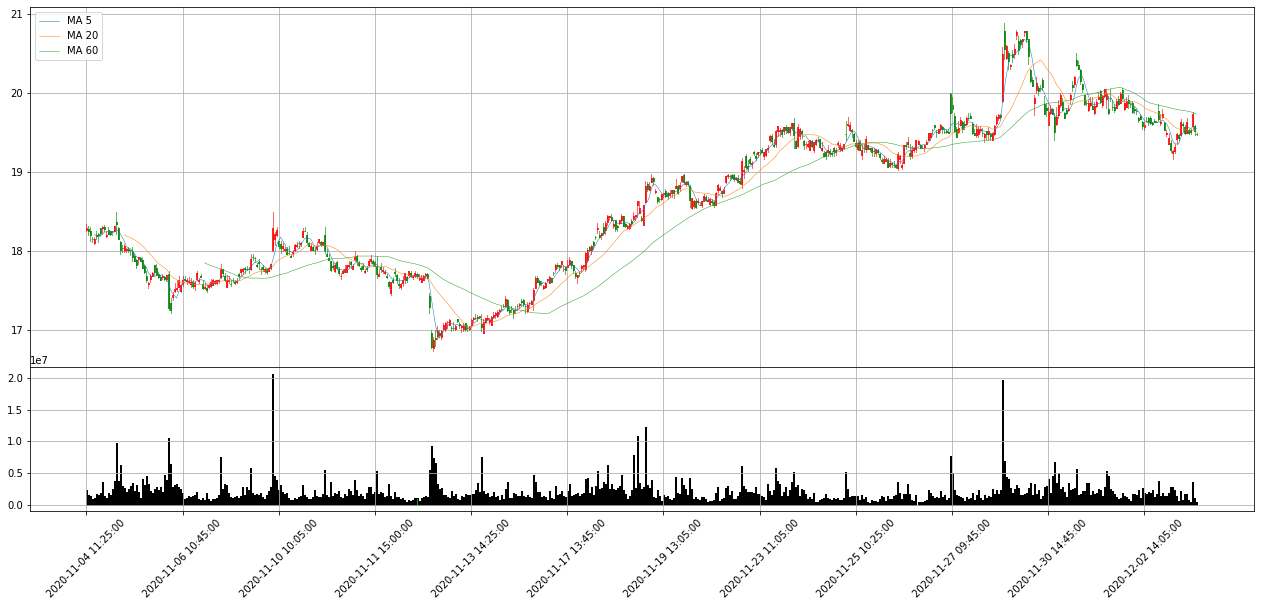

In [45]:
import talib
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ochl, volume_overlay

def candleplot(df,freq='5min'):
    df = df.resample(freq).last().dropna(axis=0)
    sma_5 = talib.SMA(df.close.values.astype('float'), 5)
    sma_20 = talib.SMA(df.close.values.astype('float'), 20)
    sma_60 = talib.SMA(df.close.values.astype('float'), 60)

    fig = plt.figure(figsize=(17, 10))
    ax = fig.add_axes([0,0.2,1,0.5])
    ax2 = fig.add_axes([0,0,1,0.2])

    candlestick2_ochl(ax, df['open'].astype('float'), df['close'].astype('float'), df['high'].astype('float'), df['low'].astype('float'),
                         width=0.5, colorup='r', colordown='g', alpha=0.6)
    ax.set_xticks(range(0, len(df['day']), 48))
    ax.plot(sma_5, linewidth=0.5, label='MA 5')
    ax.plot(sma_20, linewidth=0.5, label='MA 20')
    ax.plot(sma_60, linewidth=0.5, label='MA 60')
    ax.legend(loc='upper left')
    ax.grid(True)

    volume_overlay(ax2, df['open'].astype('float'), df['close'].astype('float'), df['volume'].astype('float'), colorup='r', colordown='g', width=0.5, alpha=0.8)
    ax2.set_xticks(range(0, len(df['day']), 48))
    ax2.set_xticklabels(df['day'][::48], rotation=45)
    ax2.grid(True)

    plt.show()

candleplot(df,'10min')